# EDA

In [1]:
# Importing necessary libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
# Reading the data from the Excel file into dataframes
policy_data = pd.read_excel('../../data/City of Portland 2023.xlsx', sheet_name='Sheet1', header=1, usecols='A:F')
user_data = pd.read_excel('../../data/City of Portland 2023.xlsx', sheet_name='Sheet2')

In [3]:
# Displaying the first few rows of each dataframe to ensure data has been loaded correctly
# Policy Data
print(policy_data.shape)
policy_data.head()

(389, 6)


,Classification Number,Type,Description,Link,Passage Date,Effective Date
0,Order 1-21-22 (PDF),Order,Order Granting a Thames Street Extension Licen...,https://content.civicplus.com/api/assets/95133...,2021-07-19,2021-07-29 00:00:00
1,Order 2-21-22 (PDF),Order,Order Accepting the Public Art Committee Fisca...,https://content.civicplus.com/api/assets/220d1...,2021-07-19,2021-07-29 00:00:00
2,Order 3-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/84fbd...,2021-07-19,2021-07-29 00:00:00
3,Order 4-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/590d7...,2021-07-19,2021-07-29 00:00:00
4,Order 5-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/167ff...,2021-07-19,2021-07-29 00:00:00


In [4]:
# User Data
print(user_data.shape)
user_data.head()

(500, 10)


,Person,Address,AGE,Interest,Enviornmental,Infastructure,Education,Zoning,Safety,Highest Rating
0,1,West End,25,Enviroment,5,2.0,3.0,1.0,3.0,Enviornmental
1,2,Parkside,49,Saftey,1,1.0,5.0,2.0,4.0,Education
2,3,East Bayside,26,Education,1,3.0,5.0,2.0,2.0,NaN
3,4,East Bayside,24,Safety,3,2.0,5.0,3.0,5.0,NaN
4,5,East End,36,Safety,1,1.0,3.0,4.0,5.0,NaN


In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Person          500 non-null    int64  
 1   Address         500 non-null    object 
 2   AGE             500 non-null    int64  
 3   Interest        500 non-null    object 
 4   Enviornmental   500 non-null    int64  
 5   Infastructure   499 non-null    float64
 6   Education       499 non-null    float64
 7   Zoning          499 non-null    float64
 8   Safety          499 non-null    float64
 9   Highest Rating  2 non-null      object 
dtypes: float64(4), int64(3), object(3)
memory usage: 39.2+ KB


In [6]:
# Update column names

# Replacing space with underscore and making column names lowercase for policy_data
policy_data.columns = [col.strip().lower().replace(' ', '_') for col in policy_data.columns]

# Making column names lowercase and enaming 'Infastructure' to 'Infrastructure' and 
user_data.columns = [col.strip().lower() for col in user_data.columns]
user_data = user_data.rename(columns={'enviornmental': 'environmental', 'infastructure': 'infrastructure'})


In [7]:
print("Updated columns for policy_data:", policy_data.columns)
print("\nUpdated columns for user_data:", user_data.columns)


Updated columns for policy_data: Index(['classification_number', 'type', 'description', 'link', 'passage_date',
       'effective_date'],
      dtype='object')

Updated columns for user_data: Index(['person', 'address', 'age', 'interest', 'environmental',
       'infrastructure', 'education', 'zoning', 'safety', 'highest rating'],
      dtype='object')


## User Data 

- **Person**: An identifier for the individual.
- **Address**: This seems to represent a locality or region in the city of Portland.
- **AGE**: The age of the individual.
- **Interest**: Represents the main interest or priority of the individual.
- **Environmental, Infrastructure, Education, Zoning, Safety**: These columns seem to represent some sort of score or rating for each policy area. These might indicate the perceived benefit or importance the individual assigns to each policy area.


In [8]:
# Getting basic descriptive statistics
user_data.describe(include='all')

,person,address,age,interest,environmental,infrastructure,education,zoning,safety,highest rating
count,500.000000,500,500.000000,500,500.000000,499.000000,499.000000,499.000000,499.000000,2
unique,NaN,10,NaN,7,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Munjoy Hill,NaN,Education,NaN,NaN,NaN,NaN,NaN,Enviornmental
freq,NaN,61,NaN,104,NaN,NaN,NaN,NaN,NaN,1
mean,250.500000,NaN,37.306000,NaN,2.466000,2.651303,2.887776,2.983968,2.883768,NaN
std,144.481833,NaN,11.299723,NaN,1.519692,1.465347,1.423917,1.369396,1.462557,NaN
min,1.000000,NaN,18.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,125.750000,NaN,28.000000,NaN,1.000000,1.000000,2.000000,2.000000,1.000000,NaN
50%,250.500000,NaN,36.500000,NaN,2.000000,2.000000,3.000000,3.000000,3.000000,NaN
75%,375.250000,NaN,47.000000,NaN,3.000000,4.000000,4.000000,4.000000,4.000000,NaN


In [9]:
# Checking for missing values in the user data
user_data.isnull().sum()

person              0
address             0
age                 0
interest            0
environmental       0
infrastructure      1
education           1
zoning              1
safety              1
highest rating    498
dtype: int64

In [10]:
# Imputing missing values with the median of the respective columns
cols_to_impute = ['infrastructure', 'education', 'zoning', 'safety']
for col in cols_to_impute:
    user_data[col].fillna(user_data[col].median(), inplace=True)

# Checking again for missing values to confirm the imputation
missing_after_imputation = user_data.isnull().sum() 
print(missing_after_imputation)


person              0
address             0
age                 0
interest            0
environmental       0
infrastructure      0
education           0
zoning              0
safety              0
highest rating    498
dtype: int64


In [11]:
# Getting basic descriptive statistics
user_data.describe(include='all')

,person,address,age,interest,environmental,infrastructure,education,zoning,safety,highest rating
count,500.000000,500,500.000000,500,500.000000,500.000000,500.000000,500.000000,500.0000,2
unique,NaN,10,NaN,7,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Munjoy Hill,NaN,Education,NaN,NaN,NaN,NaN,NaN,Enviornmental
freq,NaN,61,NaN,104,NaN,NaN,NaN,NaN,NaN,1
mean,250.500000,NaN,37.306000,NaN,2.466000,2.650000,2.888000,2.984000,2.8840,NaN
std,144.481833,NaN,11.299723,NaN,1.519692,1.464168,1.422499,1.368023,1.4611,NaN
min,1.000000,NaN,18.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.0000,NaN
25%,125.750000,NaN,28.000000,NaN,1.000000,1.000000,2.000000,2.000000,1.0000,NaN
50%,250.500000,NaN,36.500000,NaN,2.000000,2.000000,3.000000,3.000000,3.0000,NaN
75%,375.250000,NaN,47.000000,NaN,3.000000,4.000000,4.000000,4.000000,4.0000,NaN


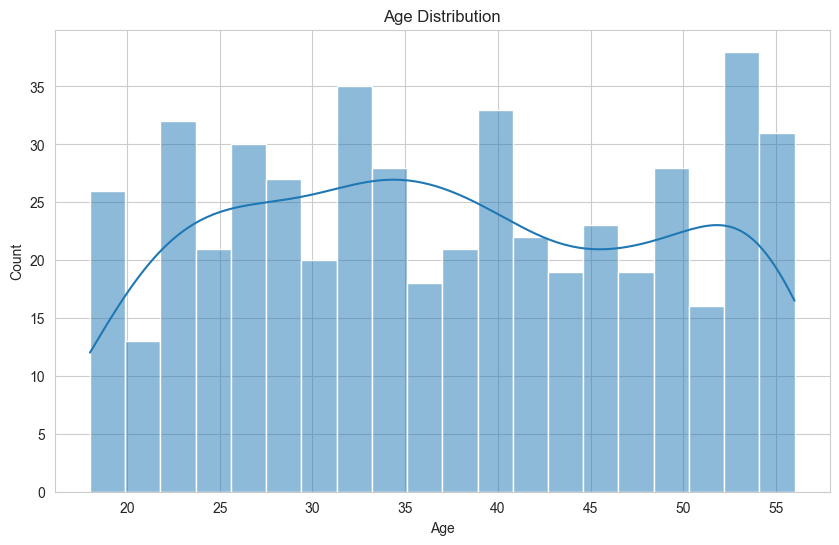

In [12]:
# Setting up the visual style
sns.set_style("whitegrid")

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_data['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/397191349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=user_data, y='address', order=sorted(user_data['address'].unique()), palette="viridis")


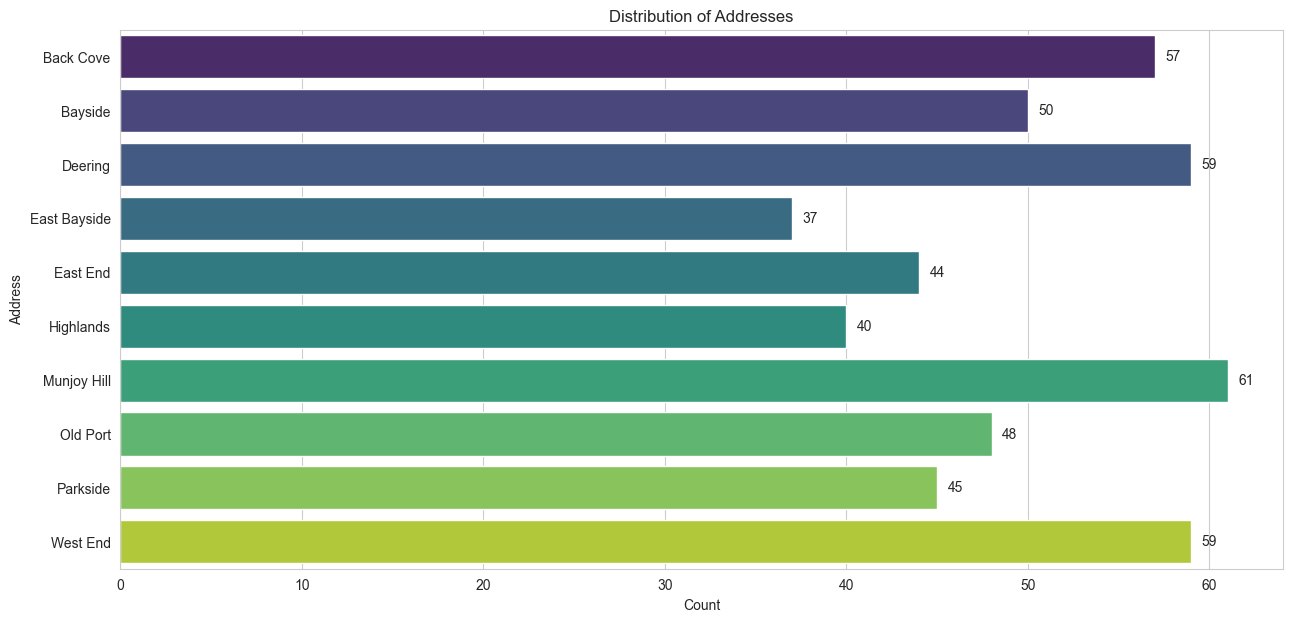

In [13]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=user_data, y='address', order=sorted(user_data['address'].unique()), palette="viridis")
plt.title('Distribution of Addresses')
plt.xlabel('Count')
plt.ylabel('Address')

# Adding count labels on the side of the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1,       # set the text at 5 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width),  # set variable to display, 2 decimals
            ha="center",   # horizontal alignment
            va="center")   # vertical alignment

plt.show()


/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2907057490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='interest', data=user_data, order=user_data['interest'].value_counts().index, palette="viridis")


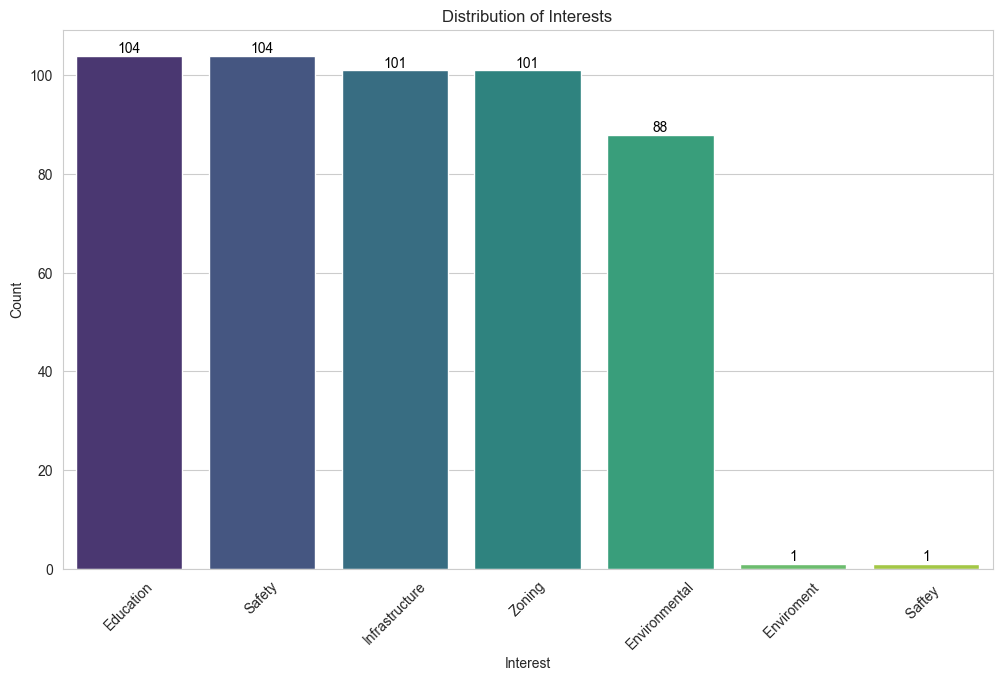

In [14]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='interest', data=user_data, order=user_data['interest'].value_counts().index, palette="viridis")
plt.title('Distribution of Interests')
plt.ylabel('Count')
plt.xlabel('Interest')
plt.xticks(rotation=45)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2416946570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=area, data=user_data, palette="viridis")


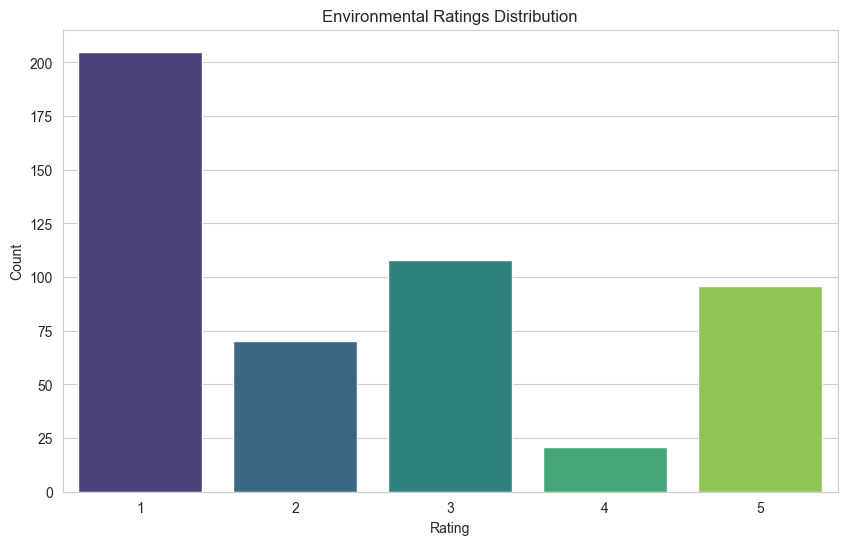

/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2416946570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=area, data=user_data, palette="viridis")


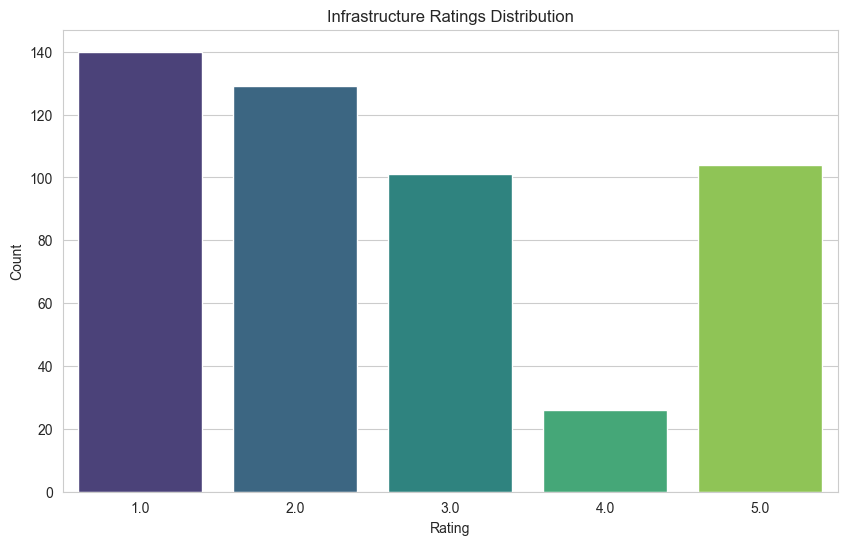

/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2416946570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=area, data=user_data, palette="viridis")


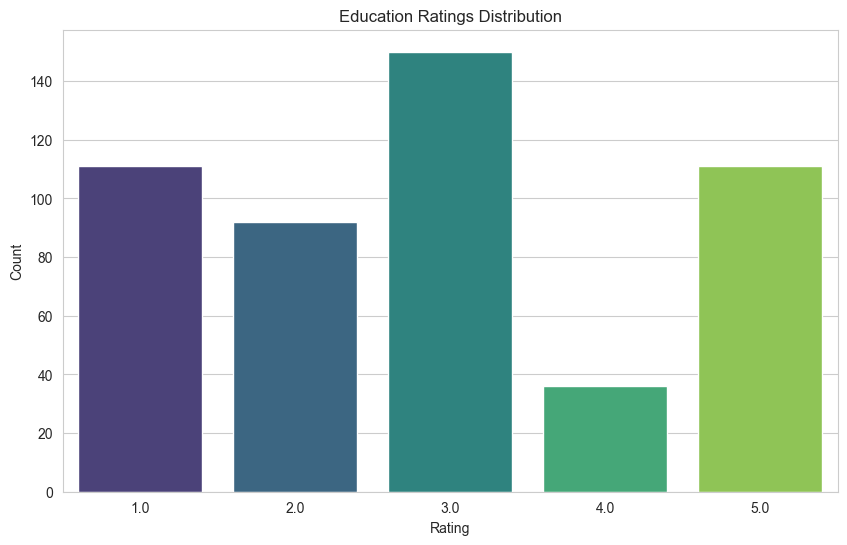

/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2416946570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=area, data=user_data, palette="viridis")


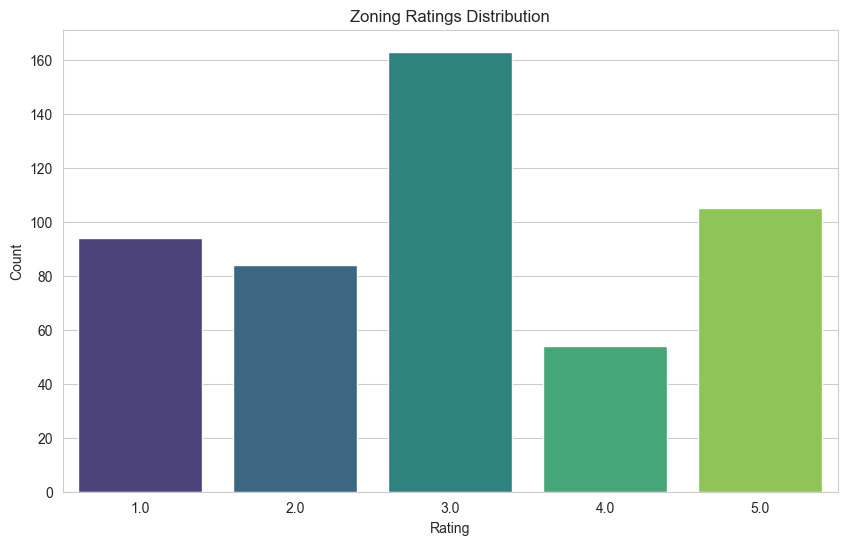

/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2416946570.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=area, data=user_data, palette="viridis")


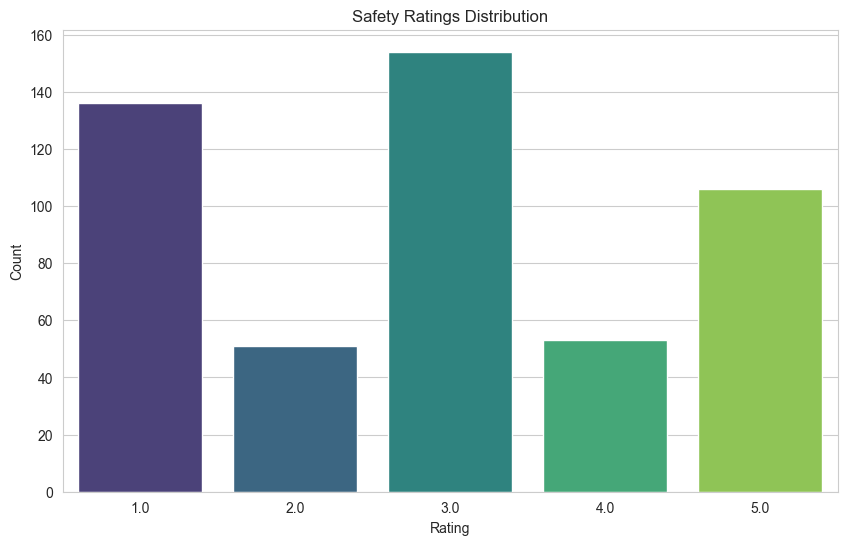

In [15]:
# Ratings Distributions for policy areas
policy_areas = ['environmental', 'infrastructure', 'education', 'zoning', 'safety']

for area in policy_areas:
    plt.figure(figsize=(10, 6))
    sns.color_palette("viridis", as_cmap=True)
    sns.countplot(x=area, data=user_data, palette="viridis")
    plt.title(f'{area.capitalize()} Ratings Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.show()

In [16]:
user_data.head()

,person,address,age,interest,environmental,infrastructure,education,zoning,safety,highest rating
0,1,West End,25,Enviroment,5,2.0,3.0,1.0,3.0,Enviornmental
1,2,Parkside,49,Saftey,1,1.0,5.0,2.0,4.0,Education
2,3,East Bayside,26,Education,1,3.0,5.0,2.0,2.0,NaN
3,4,East Bayside,24,Safety,3,2.0,5.0,3.0,5.0,NaN
4,5,East End,36,Safety,1,1.0,3.0,4.0,5.0,NaN


In [17]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   person          500 non-null    int64  
 1   address         500 non-null    object 
 2   age             500 non-null    int64  
 3   interest        500 non-null    object 
 4   environmental   500 non-null    int64  
 5   infrastructure  500 non-null    float64
 6   education       500 non-null    float64
 7   zoning          500 non-null    float64
 8   safety          500 non-null    float64
 9   highest rating  2 non-null      object 
dtypes: float64(4), int64(3), object(3)
memory usage: 39.2+ KB


In [18]:
# Leveling the age column by defining age group
def age_category(age):
    if 18 <= age <= 34:
        return "Young Adult"
    elif 35 <= age <= 54:
        return "Middle-Aged"
    else:
        return "Senior"


user_data["age_group"] = user_data["age"].apply(age_category)

/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/676297438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age_group", data=user_data, palette="viridis")


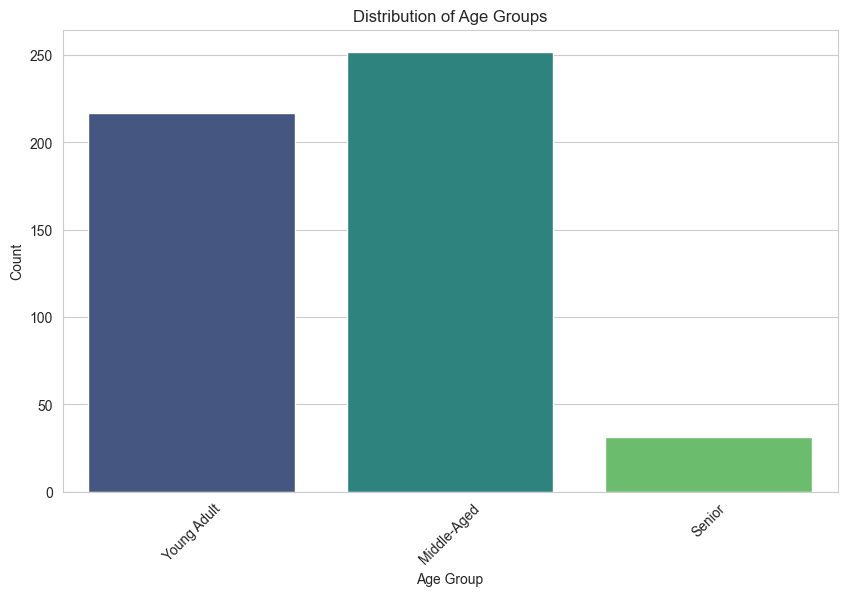

In [19]:
# Create a distribution plot for age_group
plt.figure(figsize=(10, 6))
sns.countplot(x="age_group", data=user_data, palette="viridis")
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotates the labels on x-axis to make them readable
plt.show()

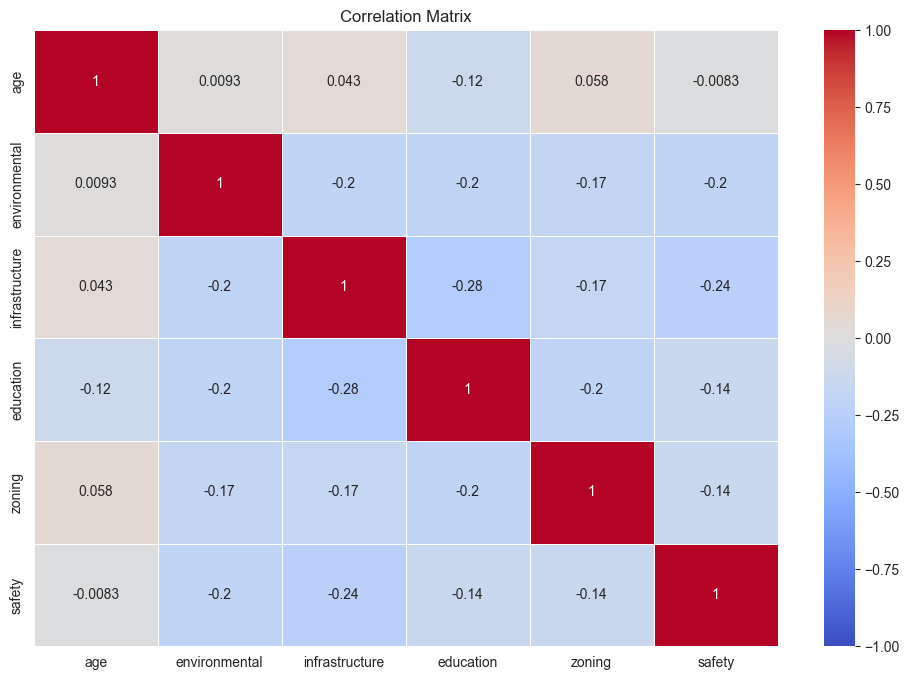

In [20]:
# Compute the correlation matrix
corr_matrix = user_data[['age', 'environmental', 'infrastructure', 'education', 'zoning', 'safety']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/737643646.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="age", y="interest", data=user_data, palette="viridis")


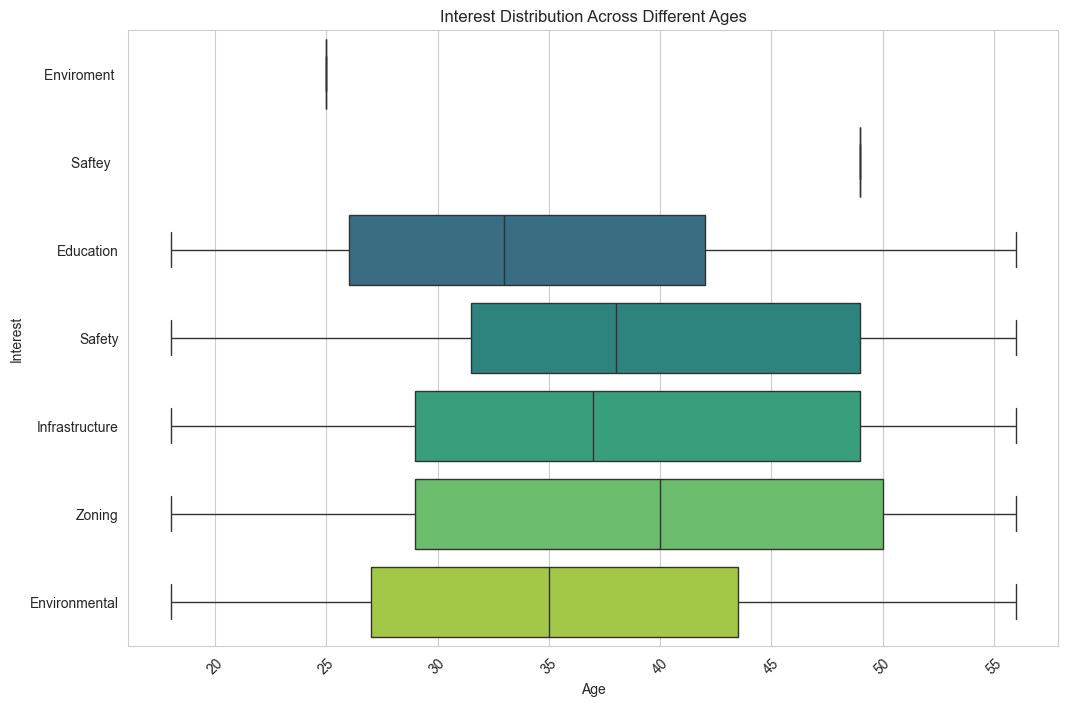

In [21]:
# Creating a boxplot to see the distribution of Interest across different ages
plt.figure(figsize=(12, 8))
sns.boxplot(x="age", y="interest", data=user_data, palette="viridis")
#sns.color_palette("viridis", as_cmap=True)
plt.title("Interest Distribution Across Different Ages")
plt.xlabel("Age")
plt.ylabel("Interest")
plt.xticks(rotation=45)
plt.show()

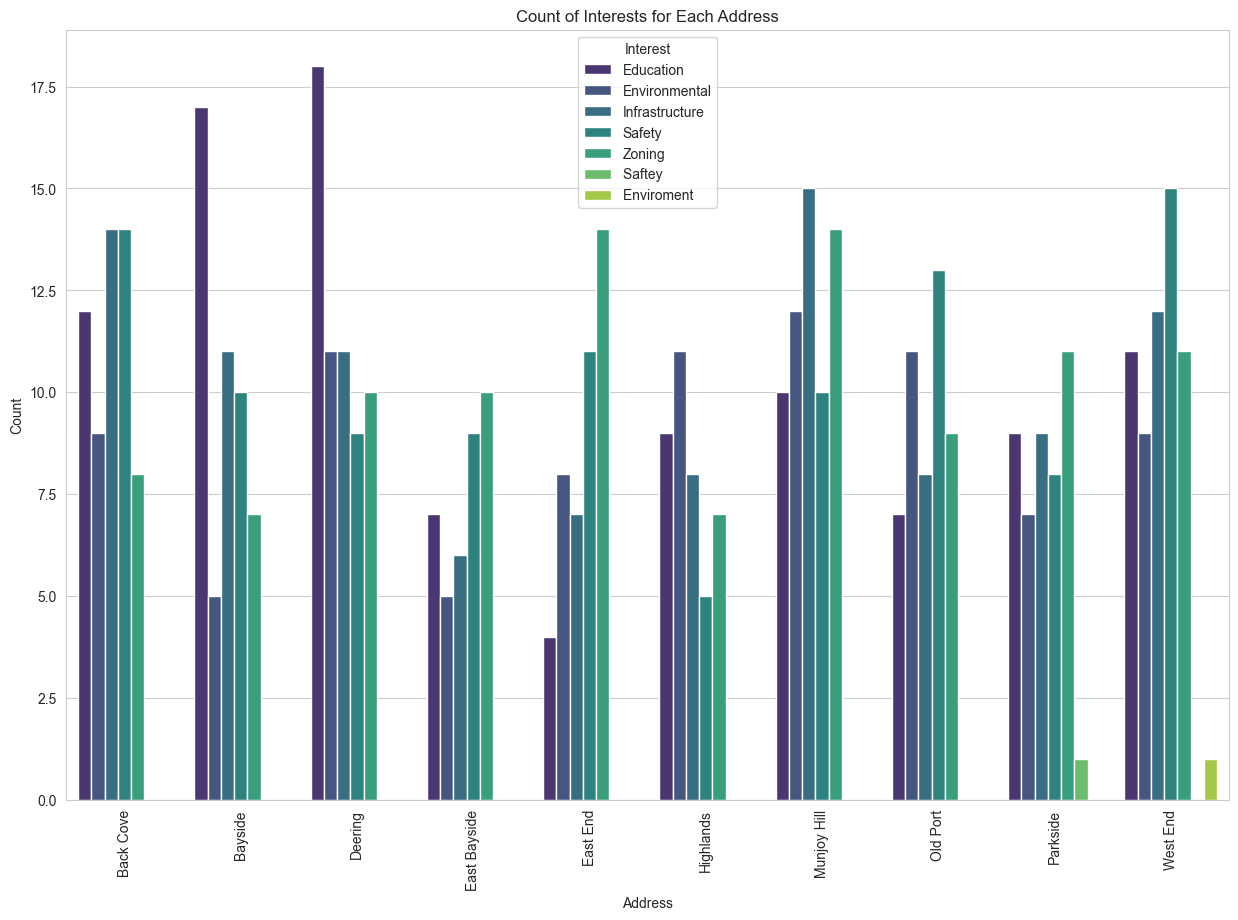

In [22]:
# Analyzing Interest based on Address
address_interest_count = (
    user_data.groupby(["address", "interest"]).size().reset_index(name="count")
)

# Creating a count plot for Interest based on Address
plt.figure(figsize=(15, 10))
sns.barplot(
    x="address",
    y="count",
    hue="interest",
    data=address_interest_count,
    palette="viridis",
)
plt.title("Count of Interests for Each Address")
plt.xlabel("Address")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Interest")
plt.show()

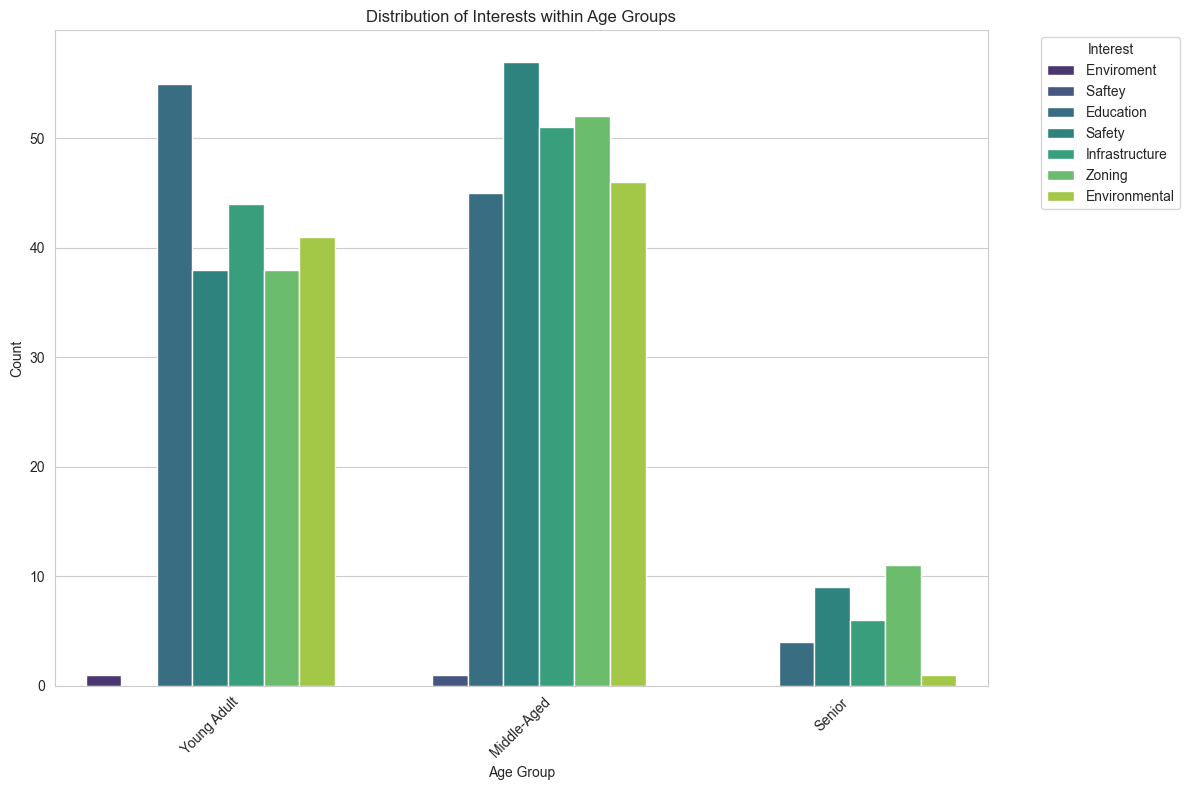

In [23]:
# Create a grouped bar plot for age_group and interest
plt.figure(figsize=(12, 8))
sns.countplot(x="age_group", hue="interest", data=user_data, palette="viridis")
plt.title("Distribution of Interests within Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Interest", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2134741110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="address", y="age", data=user_data, order=sorted_addresses, palette="viridis")


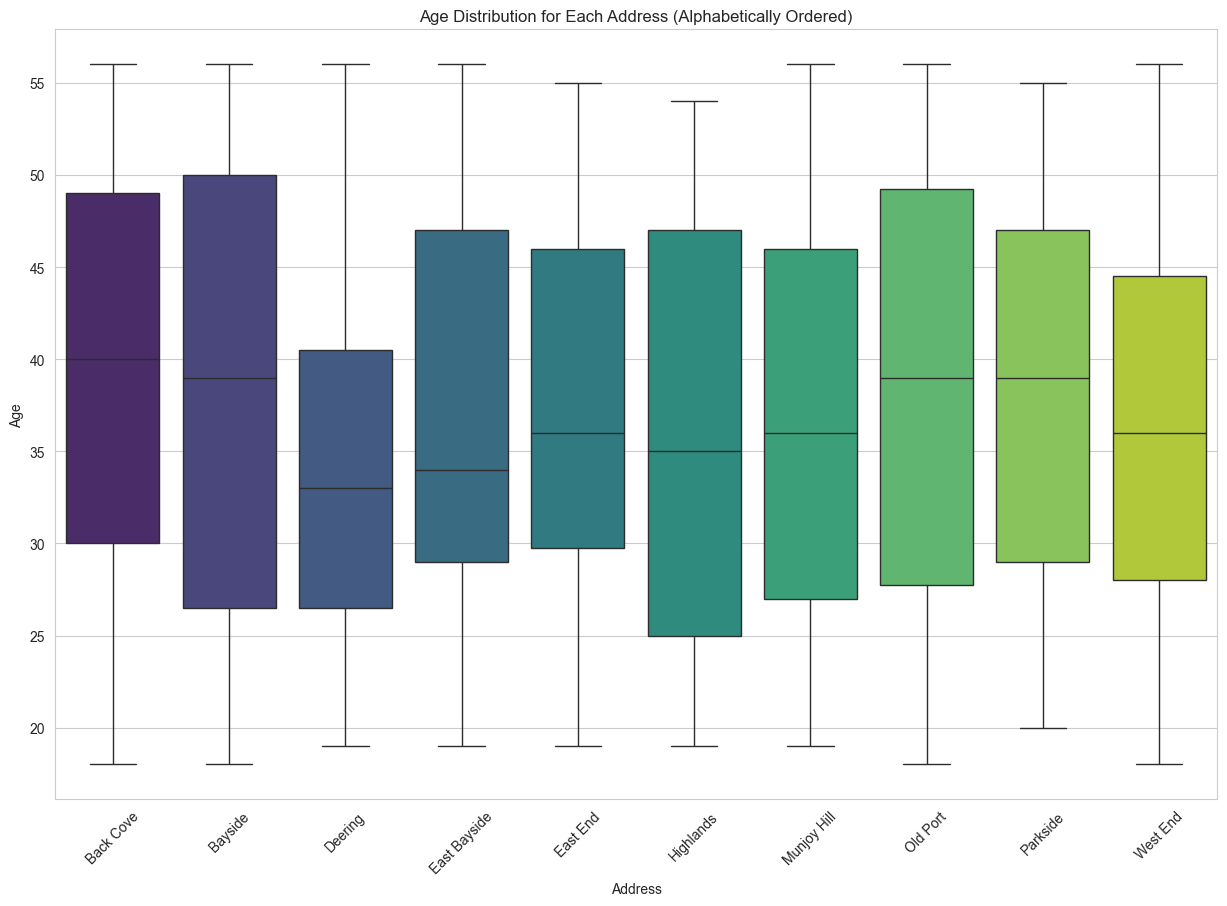

In [24]:
# Getting unique addresses and sorting them alphabetically
sorted_addresses = sorted(user_data["address"].unique())

plt.figure(figsize=(15, 10))
sns.boxplot(x="address", y="age", data=user_data, order=sorted_addresses, palette="viridis")
plt.title("Age Distribution for Each Address (Alphabetically Ordered)")
plt.xlabel("Address")
plt.ylabel("Age")
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

## Policy Data 

In [25]:
policy_data.head()

,classification_number,type,description,link,passage_date,effective_date
0,Order 1-21-22 (PDF),Order,Order Granting a Thames Street Extension Licen...,https://content.civicplus.com/api/assets/95133...,2021-07-19,2021-07-29 00:00:00
1,Order 2-21-22 (PDF),Order,Order Accepting the Public Art Committee Fisca...,https://content.civicplus.com/api/assets/220d1...,2021-07-19,2021-07-29 00:00:00
2,Order 3-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/84fbd...,2021-07-19,2021-07-29 00:00:00
3,Order 4-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/590d7...,2021-07-19,2021-07-29 00:00:00
4,Order 5-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/167ff...,2021-07-19,2021-07-29 00:00:00


In [26]:
policy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   classification_number  389 non-null    object        
 1   type                   389 non-null    object        
 2   description            389 non-null    object        
 3   link                   389 non-null    object        
 4   passage_date           378 non-null    datetime64[ns]
 5   effective_date         351 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 18.4+ KB


In [27]:
policy_data['type'].unique()

array(['Order'], dtype=object)

## Data Cleaning

### User Data

In [28]:
user_data['interest'].unique()

array(['Enviroment ', 'Saftey  ', 'Education', 'Safety', 'Infrastructure',
       'Zoning', 'Environmental'], dtype=object)

In [29]:
# Rename values in 'interest' column
user_data['interest'] = user_data['interest'].replace({
    'Enviroment ': 'Environmental',
    'Saftey  ': 'Safety'
})


/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/2907057490.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='interest', data=user_data, order=user_data['interest'].value_counts().index, palette="viridis")


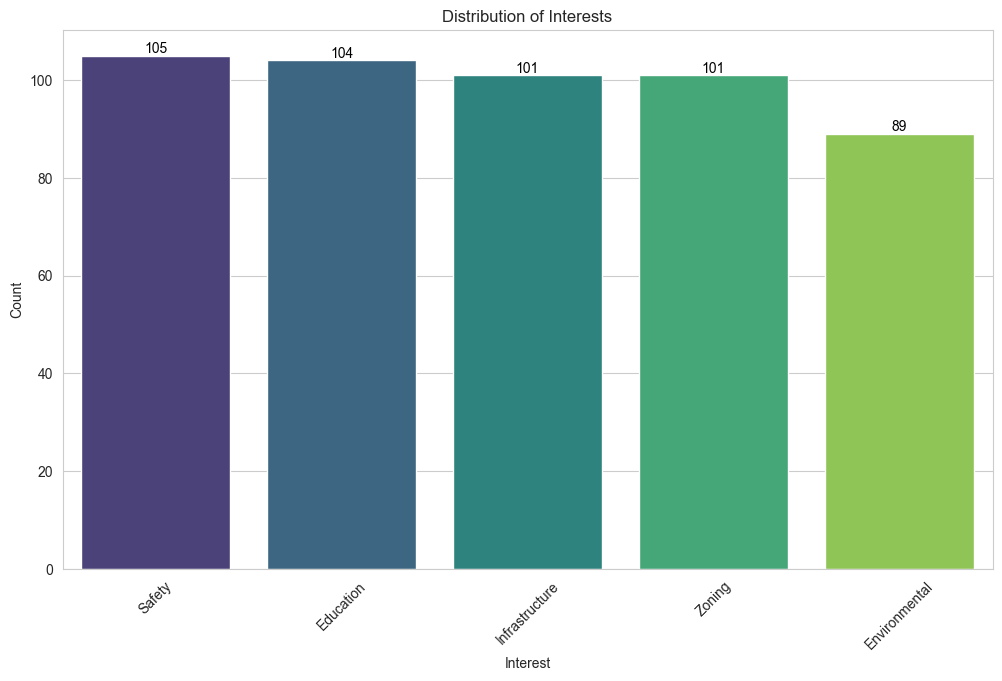

In [30]:
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='interest', data=user_data, order=user_data['interest'].value_counts().index, palette="viridis")
plt.title('Distribution of Interests')
plt.ylabel('Count')
plt.xlabel('Interest')
plt.xticks(rotation=45)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


In [31]:
columns_of_interest = ['environmental', 'infrastructure', 'education', 'zoning', 'safety']
user_data['highest_interest'] = user_data[columns_of_interest].idxmax(axis=1)
user_data['highest_interest'] = user_data['highest_interest'].str.capitalize()


/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/1794785189.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mismatch_data, y='interest', ax=ax[0], palette='viridis')
/var/folders/sy/t9_q1g257115rty06488pvd80000gn/T/ipykernel_25104/1794785189.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mismatch_data, y='highest_interest', ax=ax[1], palette='viridis')


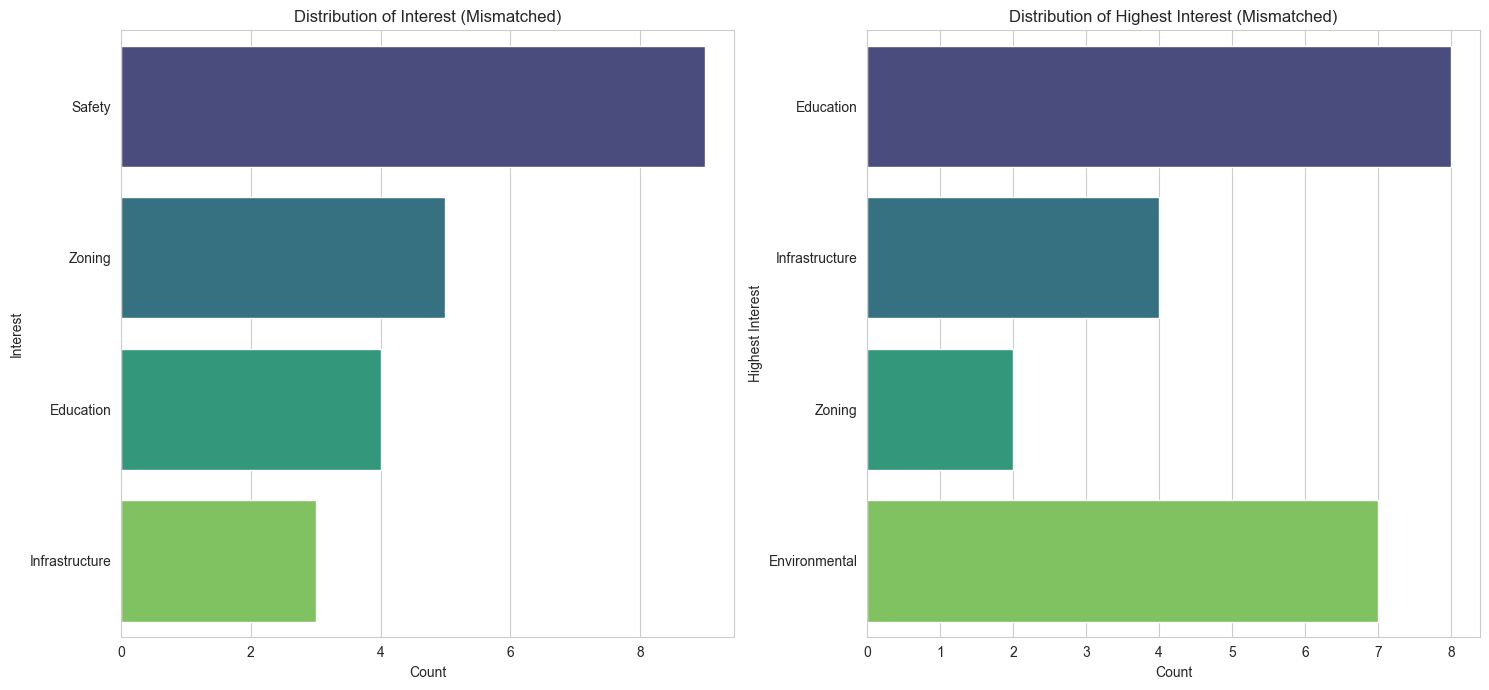

In [32]:
# Filtering the data where 'interest' and 'highest_interest' are mismatched
mismatch_data = user_data[user_data['interest'] != user_data['highest_interest']]

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Plot for 'interest'
sns.countplot(data=mismatch_data, y='interest', ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Interest (Mismatched)')
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Interest')

# Plot for 'highest_interest'
sns.countplot(data=mismatch_data, y='highest_interest', ax=ax[1], palette='viridis')
ax[1].set_title('Distribution of Highest Interest (Mismatched)')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Highest Interest')

# Layout adjustment
plt.tight_layout()
plt.show()


In [33]:
user_data

,person,address,age,interest,environmental,infrastructure,education,zoning,safety,highest rating,age_group,highest_interest
0,1,West End,25,Environmental,5,2.0,3.0,1.0,3.0,Enviornmental,Young Adult,Environmental
1,2,Parkside,49,Safety,1,1.0,5.0,2.0,4.0,Education,Middle-Aged,Education
2,3,East Bayside,26,Education,1,3.0,5.0,2.0,2.0,NaN,Young Adult,Education
3,4,East Bayside,24,Safety,3,2.0,5.0,3.0,5.0,NaN,Young Adult,Education
4,5,East End,36,Safety,1,1.0,3.0,4.0,5.0,NaN,Middle-Aged,Safety
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Back Cove,48,Education,3,1.0,5.0,3.0,1.0,NaN,Middle-Aged,Education
496,497,East Bayside,36,Zoning,3,4.0,3.0,5.0,2.0,NaN,Middle-Aged,Zoning
497,498,Back Cove,41,Zoning,2,1.0,3.0,5.0,2.0,NaN,Middle-Aged,Zoning
498,499,Deering,26,Infrastructure,3,5.0,1.0,2.0,1.0,NaN,Young Adult,Infrastructure


### Policy Data

In [34]:
policy_data.head()

,classification_number,type,description,link,passage_date,effective_date
0,Order 1-21-22 (PDF),Order,Order Granting a Thames Street Extension Licen...,https://content.civicplus.com/api/assets/95133...,2021-07-19,2021-07-29 00:00:00
1,Order 2-21-22 (PDF),Order,Order Accepting the Public Art Committee Fisca...,https://content.civicplus.com/api/assets/220d1...,2021-07-19,2021-07-29 00:00:00
2,Order 3-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/84fbd...,2021-07-19,2021-07-29 00:00:00
3,Order 4-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/590d7...,2021-07-19,2021-07-29 00:00:00
4,Order 5-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/167ff...,2021-07-19,2021-07-29 00:00:00


In [35]:
policy_data.dtypes

classification_number            object
type                             object
description                      object
link                             object
passage_date             datetime64[ns]
effective_date                   object
dtype: object

In [36]:
policy_data.describe()

,passage_date
count,378
mean,2022-06-23 15:25:42.857142784
min,2021-07-19 00:00:00
25%,2021-12-06 00:00:00
50%,2022-06-06 00:00:00
75%,2023-02-01 06:00:00
max,2023-07-17 00:00:00


In [37]:
# Convert the column to string for regex matching
policy_data['effective_date'] = policy_data['effective_date'].astype(str)

# Regular expression pattern to match YYYY-MM-DD format
pattern = re.compile(r'\d{4}-\d{2}-\d{2}')

# Create a boolean mask
mask = policy_data['effective_date'].apply(lambda x: bool(pattern.match(x)))

# Filter out rows not matching datetime format
non_datetime_values = policy_data[~mask]
print(non_datetime_values['effective_date'])


19         10/821
20         10/821
26            nan
27            nan
28            nan
29            nan
30            nan
31            nan
47            nan
48            nan
49            nan
50            nan
60            nan
61            nan
62            nan
63            nan
73            nan
74            nan
88            nan
89            nan
90            nan
91            nan
92            nan
111           nan
112           nan
113           nan
114           nan
120           nan
121           nan
122           nan
126           nan
127           nan
154           nan
155           nan
156           nan
157           nan
158           nan
159           nan
160           nan
220       7/21/22
277       12/1/22
288     1/14/2023
324           nan
Name: effective_date, dtype: object


In [38]:
# Strip the values in 'effective_date' column
policy_data['effective_date'] = policy_data['effective_date'].str.strip()

# Replace problematic dates
policy_data.loc[policy_data['effective_date'] == '10/821', 'effective_date'] = '2021-08-10 00:00:00'
policy_data.loc[policy_data['effective_date'] == '7/21/22', 'effective_date'] = '2022-07-21 00:00:00'
policy_data.loc[policy_data['effective_date'] == '12/1/22', 'effective_date'] = '2022-12-01 00:00:00'
policy_data.loc[policy_data['effective_date'] == '1/14/2023', 'effective_date'] = '2023-01-14 00:00:00'


In [39]:
# Convert to datetime format
policy_data['effective_date'] = pd.to_datetime(policy_data['effective_date'])

In [40]:
policy_data['order_id'] = policy_data['classification_number'].str.replace('/', '-')
policy_data['order_id'] = policy_data['order_id'].str.replace('Order', '')
policy_data['order_id'] = policy_data['order_id'].str.replace('(PDF)', '')
policy_data['order_id'] = policy_data['order_id'].str.strip()


In [41]:
# Extracting file type using regular expressions
policy_data['file_type'] = policy_data['classification_number'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if re.search(r'\((.*?)\)', x) else None)


In [42]:
# Check the missing values
missing_values_policy = policy_data.isnull().sum()
missing_values_policy


classification_number     0
type                      0
description               0
link                      0
passage_date             11
effective_date           38
order_id                  0
file_type                 0
dtype: int64

In [43]:
policy_data

,classification_number,type,description,link,passage_date,effective_date,order_id,file_type
0,Order 1-21-22 (PDF),Order,Order Granting a Thames Street Extension Licen...,https://content.civicplus.com/api/assets/95133...,2021-07-19,2021-07-29,1-21-22,PDF
1,Order 2-21-22 (PDF),Order,Order Accepting the Public Art Committee Fisca...,https://content.civicplus.com/api/assets/220d1...,2021-07-19,2021-07-29,2-21-22,PDF
2,Order 3-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/84fbd...,2021-07-19,2021-07-29,3-21-22,PDF
3,Order 4-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/590d7...,2021-07-19,2021-07-29,4-21-22,PDF
4,Order 5-21-22 (PDF),Order,Order Granting Municipal Officers’ Approval of...,https://content.civicplus.com/api/assets/167ff...,2021-07-19,2021-07-29,5-21-22,PDF
...,...,...,...,...,...,...,...,...
384,Order 255-22/23 (PDF),Order,"ORDER ACCEPTING AND APPROPRIATING $9,428.57 IN...",https://content.civicplus.com/api/assets/89003...,2023-06-26,2023-06-26,255-22-23,PDF
385,Order 260-22-23 (PDF),Order,PROPOSING AN AMENDMENT TO PORTLAND CITY CHARTE...,https://content.civicplus.com/api/assets/a147d...,2023-07-17,2023-07-27,260-22-23,PDF
386,Order 262-22/23 (PDF),Order,ORDER APPOINTING AND SETTING SALARY OF MARK W....,https://content.civicplus.com/api/assets/a258d...,2023-06-26,2023-07-06,262-22-23,PDF
387,Order 263-22/23 (PDF),Order,CONTINUING RESOLUTION IN LIEU OF FISCAL YEAR 2...,https://content.civicplus.com/api/assets/19ab9...,2023-06-26,2023-07-01,263-22-23,PDF


# Policy Data

## Import Libraries

In [44]:
# !pip install pandas
# !pip install spacy
# !pip install PyPDF2

In [45]:
import pandas as pd
import requests  # For downloading PDF files
from PyPDF2 import PdfReader  # For reading PDF files
import re  # For regex operations
import spacy  # For NLP tasks


## Load the Excel File

In [46]:
df = pd.read_excel(
    "../../data/City of Portland 2023 (3).xlsx",
    sheet_name="Sheet1",
    header=1,
    # usecols="A:F",
)

In [47]:
df.head(5)

,Classification Number,Type,Description,Link,Passage Date,Effective Date,Issue Category,Category Types
0,Order 12-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 8\nRe:...,https://content.civicplus.com/api/assets/b2e87...,2019-08-12,2019-09-11 00:00:00,Zoning and infrastructure,Infastructure
1,Order 84-19-20 (PDF),Order,"ORDER APPROVING THE APPLICATION FOR, ACCEPTANC...",https://content.civicplus.com/api/assets/ea087...,2019-11-18,2019-11-28 00:00:00,Environment,Education
2,Order 83-19-20 (PDF),Order,ORDER APPROVING MODIFICATION TO TWO-PARTY AGRE...,https://content.civicplus.com/api/assets/299d3...,2019-11-18,2019-11-28 00:00:00,Infrastructure,Zoning
3,Order 146-19-20 (PDF),Order,ORDER ACCEPTING AND ADOPTING THE 2020 HOUSING ...,https://content.civicplus.com/api/assets/e1184...,2020-03-02,2020-03-12 00:00:00,Infrastructure,Safety
4,Order 54-19-20 (PDF),Order,"ORDER APPROPRIATING $36,000 FROM THE HOUSING T...",https://content.civicplus.com/api/assets/1768f...,2019-10-21,2019-10-31 00:00:00,Infrastructure,Environment


## Download and extract information from pdfs

In [48]:
from io import BytesIO

def download_and_read_pdf(url):
    try:
        response = requests.get(url)
        # Read PDF directly from the BytesIO stream without saving to a file
        reader = PdfReader(BytesIO(response.content))
        text = ''
        for page in reader.pages:
            text += page.extract_text() + '\n'
        return text
    except Exception as e:
        return f"Error: {e}"


In [49]:
# Renaming the columns for clarity
df.columns = ['Classification Number', 'Type', 'Description', 'Link', 'Passage Date', 'Effective Date', 'Issue Category', 'Category Types']

# Verify the column names
print(df.columns)



Index(['Classification Number', 'Type', 'Description', 'Link', 'Passage Date',
       'Effective Date', 'Issue Category', 'Category Types'],
      dtype='object')


In [50]:
# Applying the function to each PDF link in the DataFrame
df['PDF Content'] = df['Link'].apply(download_and_read_pdf)


unknown widths : 
[0, IndirectObject(198, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(193, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(188, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(178, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(173, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(167, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(156, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(151, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(142, 0, 140551628043936)]
unknown widths : 
[0, IndirectObject(816, 0, 140551605309392)]
unknown widths : 
[0, IndirectObject(811, 0, 140551605309392)]
unknown widths : 
[0, IndirectObject(806, 0, 140551605309392)]
unknown widths : 
[0, IndirectObject(801, 0, 140551605309392)]
unknown widths : 
[0, IndirectObject(796, 0, 140551605309392)]
unknown widths : 
[0, IndirectObject(791, 0, 140551605309392)]
unknown widths : 
[0, IndirectObject(786, 0, 1405516053

In [51]:
# Deleting the first row of the DataFrame
df = df.drop(index=0)

# Display the first few rows to verify
df.head()

,Classification Number,Type,Description,Link,Passage Date,Effective Date,Issue Category,Category Types,PDF Content
1,Order 84-19-20 (PDF),Order,"ORDER APPROVING THE APPLICATION FOR, ACCEPTANC...",https://content.civicplus.com/api/assets/ea087...,2019-11-18,2019-11-28 00:00:00,Environment,Education,Order 84 -19/20 \nPassage: 8 -0 (Cook absent)...
2,Order 83-19-20 (PDF),Order,ORDER APPROVING MODIFICATION TO TWO-PARTY AGRE...,https://content.civicplus.com/api/assets/299d3...,2019-11-18,2019-11-28 00:00:00,Infrastructure,Zoning,Order 83 -19/20 \nPassage: 8 -0 (Cook absent) ...
3,Order 146-19-20 (PDF),Order,ORDER ACCEPTING AND ADOPTING THE 2020 HOUSING ...,https://content.civicplus.com/api/assets/e1184...,2020-03-02,2020-03-12 00:00:00,Infrastructure,Safety,\nOrder 146 -19/20 \nPassage: 9 -0 on 3/ 2/20...
4,Order 54-19-20 (PDF),Order,"ORDER APPROPRIATING $36,000 FROM THE HOUSING T...",https://content.civicplus.com/api/assets/1768f...,2019-10-21,2019-10-31 00:00:00,Infrastructure,Environment,Order 54 -19/20 \nPassage: 8 -0 (Ali absent) o...
5,Order 59-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 10 RE:...,https://content.civicplus.com/api/assets/af3b4...,2019-11-04,2019-12-04 00:00:00,Safety,NaN,Order 59 -19/20 \nMotion to postpone to Novem...


# Extract Address and categorize Address into Neighbourhoods

In [52]:
# pip install geopy

In [53]:
from geopy.geocoders import Nominatim
import time
from geopy.exc import GeocoderTimedOut, GeocoderUnavailable
from geopy.exc import GeocoderServiceError

In [54]:
# Define the address pattern
address_pattern = r'\d+\s[A-Za-z]+(?:\s[A-Za-z]+)+'

def find_addresses(text):
    return re.findall(address_pattern, text)

df['Extracted Addresses'] = df['PDF Content'].apply(find_addresses)

In [55]:
# Display the first few rows to verify
df.head()

,Classification Number,Type,Description,Link,Passage Date,Effective Date,Issue Category,Category Types,PDF Content,Extracted Addresses
1,Order 84-19-20 (PDF),Order,"ORDER APPROVING THE APPLICATION FOR, ACCEPTANC...",https://content.civicplus.com/api/assets/ea087...,2019-11-18,2019-11-28 00:00:00,Environment,Education,Order 84 -19/20 \nPassage: 8 -0 (Cook absent)...,"[000 Brownfields assessment grant from the, 00..."
2,Order 83-19-20 (PDF),Order,ORDER APPROVING MODIFICATION TO TWO-PARTY AGRE...,https://content.civicplus.com/api/assets/299d3...,2019-11-18,2019-11-28 00:00:00,Infrastructure,Zoning,Order 83 -19/20 \nPassage: 8 -0 (Cook absent) ...,[00 is hereby approved in substantially the fo...
3,Order 146-19-20 (PDF),Order,ORDER ACCEPTING AND ADOPTING THE 2020 HOUSING ...,https://content.civicplus.com/api/assets/e1184...,2020-03-02,2020-03-12 00:00:00,Infrastructure,Safety,\nOrder 146 -19/20 \nPassage: 9 -0 on 3/ 2/20...,"[2020 HOUSING TRUST FUND ANNUAL PLAN, 2020 Hou..."
4,Order 54-19-20 (PDF),Order,"ORDER APPROPRIATING $36,000 FROM THE HOUSING T...",https://content.civicplus.com/api/assets/1768f...,2019-10-21,2019-10-31 00:00:00,Infrastructure,Environment,Order 54 -19/20 \nPassage: 8 -0 (Ali absent) o...,"[000 FROM THE HOUSING TRUST FUND, 18 LUTHER ST..."
5,Order 59-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 10 RE:...,https://content.civicplus.com/api/assets/af3b4...,2019-11-04,2019-12-04 00:00:00,Safety,NaN,Order 59 -19/20 \nMotion to postpone to Novem...,"[10 is hereby amended to read as follows, 1 is..."


In [56]:
# Define the get_neighborhood function
def get_neighborhood(address, api_key=None):
    if api_key:
        # Google Maps Geocoding API
        geocode_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={api_key}"
        try:
            response = requests.get(geocode_url)
            if response.status_code == 200:
                json_response = response.json()
                if json_response['results']:
                    lat = json_response['results'][0]['geometry']['location']['lat']
                    lng = json_response['results'][0]['geometry']['location']['lng']
                    # Additional logic to map lat, lng to a neighborhood
                    neighborhood = map_coordinates_to_neighborhood(lat, lng)
                    return neighborhood
                else:
                    return "No results found for the address"
            else:
                return f"Error in Geocoding API: {response.status_code}"
        except requests.RequestException as e:
            return f"Request error in Geocoding API: {e}"
    else:
        # Nominatim Geocoding
        geolocator = Nominatim(user_agent="neighborhood_locator", timeout=10)
        try:
            location = geolocator.geocode(address, addressdetails=True, language="en")
            if location:
                result = geolocator.reverse((location.latitude, location.longitude), addressdetails=True, language="en")
                address_details = result.raw.get('address', {})
                neighborhood = address_details.get('neighbourhood', 
                                                   address_details.get('suburb', 
                                                   address_details.get('city_district', 
                                                   address_details.get('quarter', 
                                                   address_details.get('hamlet', 
                                                   address_details.get('town', 
                                                   address_details.get('village', 'City of Portland')))))))
                return neighborhood
            return 'City of Portland'
        except GeocoderServiceError as e:
            return f"Geocoding service error: {e}"

# List of street addresses
street_addresses = [
    "200 Anderson St, Ste 6, Portland, Maine",
    "11 Brown Street, Portland, Maine",
    "468 Fore Street, Portland, Maine",
    "Franklin Street and Marginal Way, Portland, Maine",
    "152-160 State Street, Portland, Maine",
    "625 Congress Street, Portland, Maine",
    "99 Winter Street, Portland, Maine",
    "4 Thompson’s Point, Portland, Maine",
    "64 Pine St, Portland, Maine",
    "919 Congress St, Portland, Maine",
    "Local 740, Portland, Maine",
    "99 Capisic Street, Portland, Maine",
    "158 Fore St, Portland, Maine"
]

df['Address'] = df['Extracted Addresses'].apply(lambda addresses: get_neighborhood(addresses[0]) if addresses else 'City of Portland')


In [ ]:

# Display the DataFrame to see the results
print(df[['Extracted Addresses', 'Address']])

                                   Extracted Addresses           Address
1    [000 Brownfields assessment grant from the, 00...  City of Portland
2    [00 is hereby approved in substantially the fo...  City of Portland
3    [2020 HOUSING TRUST FUND ANNUAL PLAN, 2020 Hou...  City of Portland
4    [000 FROM THE HOUSING TRUST FUND, 18 LUTHER ST...  City of Portland
5    [10 is hereby amended to read as follows, 1 is...  City of Portland
..                                                 ...               ...
385  [57 IN ASSISTANCE TO, 57 from the United State...  City of Portland
386  [30 days after approval at the election, 0 on ...  City of Portland
387                                                 []  City of Portland
388  [7 of the City Charter, 428 per month is hereb...  City of Portland
389  [211 CUMBERLAND AVENUE, 211 Cumberland Avenue,...          Westcott

[389 rows x 2 columns]


In [ ]:
df['Address'].value_counts()

Address
City of Portland                                           318
Downtown                                                     6
Progress                                                     5
Old Port                                                     3
Riverton                                                     3
Arts District                                                3
Geocoding service error: Non-successful status code 500      2
Belmont                                                      2
Lephalale Ward 3                                             2
Figullar ED                                                  1
Six Ways                                                     1
Sheidow Park                                                 1
元宿町                                                          1
Hebron                                                       1
Cobh Rural ED                                                1
Villemoisson-sur-Orge                          

# Keyword matching and Categorizing

## 1. Extracting Key words using word vector

In [ ]:
# !python -m spacy download en_core_web_sm


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Create a copy of the original DataFrame
df2 = df.copy()


In [ ]:
base_keywords = {
    'infrastructure': {'roads', 'bridges', 'highways', 'tunnels', 'railways', 'airports', 'ports', 'public transport', 'utilities', 'water supply', 'sewer systems', 'electric grid', 'telecommunication', 'dams', 'stormwater management', 'waste management', 'energy facilities', 'solar farms', 'wind farms', 'housing', 'commercial buildings', 'industrial plants', 'construction', 'urban planning', 'civil engineering', 'traffic management', 'public works', 'street lighting', 'parking structures', 'bike lanes', 'pedestrian paths', 'public parks', 'schools', 'hospitals', 'government buildings', 'emergency services', 'telecommunication networks', 'broadband infrastructure', 'pipelines', 'mass transit systems', 'water treatment facilities', 'recycling centers', 'smart city technologies', 'data centers', 'network infrastructure', 'district heating', 'cooling systems', 'landscaping', 'urban furniture', 'signage'},
    'Education': {
'school', 'university', 'college', 'classroom', 'curriculum', 'syllabus', 'lecture', 'seminar', 'workshop', 'tutorial', 'course', 'lesson', 'textbook', 'blackboard', 'whiteboard', 'projector', 'exam', 'test', 'quiz', 'assignment', 'homework', 'paper', 'thesis', 'research', 'study', 'scholarship', 'tuition', 'enrollment', 'graduation', 'diploma', 'degree', 'faculty', 'professor', 'teacher', 'educator', 'mentor', 'student', 'pupil', 'learner', 'pedagogy', 'didactics', 'education theory', 'online learning', 'e-learning', 'MOOC', 'blended learning', 'interactive learning', 'experiential learning', 'vocational training', 'adult education'
},
    'Zoning': {'land use', 'urban development', 'city planning', 'building codes', 'residential zones', 'commercial zones', 'industrial zones', 'mixed-use zones', 'agricultural zones', 'rural zones', 'environmental conservation', 'heritage preservation', 'urban renewal', 'development permits', 'zoning regulations', 'zoning laws', 'zoning ordinances', 'zoning maps', 'building restrictions', 'property boundaries', 'land division', 'density regulations', 'height restrictions', 'setback requirements', 'parking regulations', 'landscaping requirements', 'public space', 'community development', 'urban design', 'master planning', 'smart growth', 'sustainable development', 'transit-oriented development', 'infill development', 'green zones', 'buffer zones', 'noise ordinances', 'light pollution', 'air rights', 'floor area ratio', 'building footprint', 'planned unit development', 'zoning appeals', 'zoning variances', 'zoning enforcement', 'zoning hearings', 'community zoning boards'},
    'Environment': {'ecology', 'conservation', 'sustainability', 'biodiversity', 'climate change', 'renewable energy', 'pollution control', 'waste management', 'recycling', 'water conservation', 'air quality', 'soil health', 'deforestation', 'reforestation', 'carbon footprint', 'greenhouse gases', 'environmental impact', 'natural resources', 'wildlife protection', 'habitat restoration', 'environmental policy', 'environmental regulations', 'sustainable agriculture', 'sustainable transportation', 'energy efficiency', 'green building', 'clean technology', 'ecosystem services', 'environmental education', 'conservation areas', 'national parks', 'marine reserves', 'protected species', 'environmental monitoring', 'environmental assessments', 'environmental audits', 'environmental activism', 'environmental justice', 'environmental stewardship', 'community engagement', 'public awareness', 'corporate social responsibility', 'environmental ethics', 'circular economy', 'green infrastructure', 'urban greening', 'land preservation', 'watershed management', 'ocean conservation'},
    'Safety': {'security', 'protection', 'surveillance', 'emergency response', 'fire safety', 'first aid', 'risk assessment', 'hazard prevention', 'occupational health', 'safety training', 'safety regulations', 'compliance', 'safety equipment', 'personal protective equipment', 'alarms', 'safety signage', 'evacuation plans', 'accident prevention', 'safety audits', 'safety protocols', 'security personnel', 'safety barriers', 'traffic safety', 'road safety', 'child safety', 'food safety', 'public health', 'environmental health', 'radiation safety', 'chemical safety', 'electrical safety', 'construction safety', 'industrial safety', 'workplace safety', 'cybersecurity', 'data security', 'home safety', 'community safety', 'disaster preparedness', 'emergency drills', 'safety inspections', 'safety certifications', 'safety standards', 'safety policies', 'safety management systems', 'safety culture', 'safety awareness'}
}

def expand_keywords(base_keywords):
    expanded_keywords1 = {}
    for category, keywords in base_keywords.items():
        expanded_keywords1[category] = set()
        for keyword in keywords:
            # Add the base keyword
            expanded_keywords1[category].add(keyword)
            # Find similar words using the word vector of the keyword
            query_word = nlp(keyword)
            for similar_word in query_word.vocab:
                if similar_word.has_vector and similar_word.is_lower and similar_word.lower_ != query_word.lower_:
                    if similar_word.similarity(query_word) > 0.1:  # Adjust the similarity threshold as needed
                        expanded_keywords1[category].add(similar_word.lower_)
    return expanded_keywords1

# Expand the keywords
expanded_keywords1 = expand_keywords(base_keywords)




In [ ]:
def categorize_text(text, expanded_keywords1):
    doc = nlp(text)
    categories = set()

    for token in doc:
        for category, keywords in expanded_keywords1.items():
            if token.text.lower() in keywords:
                categories.add(category)

    return ', '.join(categories) if categories else 'Uncategorized'



In [ ]:
# Categorizing based on the content of the PDFs
df2['Issue Category'] = df2.apply(
    lambda row: categorize_text(row['PDF Content'], expanded_keywords1) if pd.isna(row['Issue Category']) else row['Issue Category'],
    axis=1
)

# Display the updated DataFrame
print(df2[['PDF Content', 'Issue Category']].head())



                                         PDF Content  Issue Category
1   Order 84 -19/20 \nPassage: 8 -0 (Cook absent)...     Environment
2  Order 83 -19/20 \nPassage: 8 -0 (Cook absent) ...  Infrastructure
3   \nOrder 146 -19/20 \nPassage: 9 -0 on 3/ 2/20...  Infrastructure
4  Order 54 -19/20 \nPassage: 8 -0 (Ali absent) o...  Infrastructure
5   Order 59 -19/20 \nMotion to postpone to Novem...          Safety


In [ ]:
df2.head(10)

,Classification Number,Type,Description,Link,Passage Date,Effective Date,Issue Category,Category Types,PDF Content,Extracted Addresses,Address
1,Order 84-19-20 (PDF),Order,"ORDER APPROVING THE APPLICATION FOR, ACCEPTANC...",https://content.civicplus.com/api/assets/ea087...,2019-11-18,2019-11-28 00:00:00,Environment,Education,Order 84 -19/20 \nPassage: 8 -0 (Cook absent)...,"[000 Brownfields assessment grant from the, 00...",City of Portland
2,Order 83-19-20 (PDF),Order,ORDER APPROVING MODIFICATION TO TWO-PARTY AGRE...,https://content.civicplus.com/api/assets/299d3...,2019-11-18,2019-11-28 00:00:00,Infrastructure,Zoning,Order 83 -19/20 \nPassage: 8 -0 (Cook absent) ...,[00 is hereby approved in substantially the fo...,City of Portland
3,Order 146-19-20 (PDF),Order,ORDER ACCEPTING AND ADOPTING THE 2020 HOUSING ...,https://content.civicplus.com/api/assets/e1184...,2020-03-02,2020-03-12 00:00:00,Infrastructure,Safety,\nOrder 146 -19/20 \nPassage: 9 -0 on 3/ 2/20...,"[2020 HOUSING TRUST FUND ANNUAL PLAN, 2020 Hou...",City of Portland
4,Order 54-19-20 (PDF),Order,"ORDER APPROPRIATING $36,000 FROM THE HOUSING T...",https://content.civicplus.com/api/assets/1768f...,2019-10-21,2019-10-31 00:00:00,Infrastructure,Environment,Order 54 -19/20 \nPassage: 8 -0 (Ali absent) o...,"[000 FROM THE HOUSING TRUST FUND, 18 LUTHER ST...",City of Portland
5,Order 59-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 10 RE:...,https://content.civicplus.com/api/assets/af3b4...,2019-11-04,2019-12-04 00:00:00,Safety,NaN,Order 59 -19/20 \nMotion to postpone to Novem...,"[10 is hereby amended to read as follows, 1 is...",City of Portland
6,Order 61-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 12. GA...,https://content.civicplus.com/api/assets/efb4d...,2019-10-21,2019-11-20 00:00:00,Environment,NaN,Order 61 -19/20 \nMotion to amend by adding a...,"[12 is hereby amended to read as follows, 100 ...",City of Portland
7,Order 134-19-20 (PDF),Order,ORDER AUTHORIZING THE PURCHASE OF NET ENERGY B...,https://content.civicplus.com/api/assets/f42ae...,2020-02-19,2020-02-19 00:00:00,Environment,NaN,Order 13 4-19/20 \nMotion to waive the second ...,[313 of the Maine],City of Portland
8,Order 111-19-20 (PDF),Amendment,AMENDMENT TO ZONING MAP RE: HARVARD STREET,https://content.civicplus.com/api/assets/adf64...,2020-01-22,2020-02-21 00:00:00,Zoning,NaN,"Order 1 11-19/20 \nPassage: 6- 3 (Mavodones, C...",[3 to R],Saburtalo
9,Order 109-19-20 (PDF),Order,ORDER APPROVING AND APPROPRIATING FEDERAL AVIA...,https://content.civicplus.com/api/assets/35491...,2020-01-22,2020-02-01 00:00:00,infrastructure,NaN,Order 109 -19/20 \nPassage: 9 -0 on 1/22/2020 ...,"[46 million dollars, 2020 entitlement and disc...",City of Portland
10,Order 108-19-20 (PDF),Order,"ORDER ACCEPTING AND APPROPRIATING A $15,000 GR...",https://content.civicplus.com/api/assets/acaa2...,2020-01-22,2020-02-01 00:00:00,Education,NaN,Order 108 -19/20 \nPassage: 9 -0 on 1/22/2020...,"[000 is hereby accepted, 000 is hereby appropr...",City of Portland


In [ ]:
category_counts = df2['Issue Category'].value_counts()

print(category_counts)

Issue Category
Uncategorized                                     200
infrastructure                                     38
Education                                          31
infrastructure, Education, Safety                  31
infrastructure, Education                          19
infrastructure, Education, Safety, Environment     16
Safety                                             12
Environment                                        10
infrastructure, Safety                              6
Education, Safety                                   5
Infrastructure                                      4
Zoning                                              4
infrastructure, Safety, Environment                 3
infrastructure, Environment                         3
Education, Safety, Environment                      2
infrastructure, Education, Environment              2
Education/Infrastructure                            1
Education, Environment                              1
Safety, Envir

### We had 200 policies that could not be categorized

## 2 Extracting Key words using wordnet

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/phyo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/phyo/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# Create a copy of the original DataFrame
df3 = df.copy()


In [ ]:
# Base keywords
base_keywords = {
    'infrastructure': {'roads', 'bridges', 'highways', 'tunnels', 'railways', 'airports', 'ports', 'public transport', 'utilities', 'water supply', 'sewer systems', 'electric grid', 'telecommunication', 'dams', 'stormwater management', 'waste management', 'energy facilities', 'solar farms', 'wind farms', 'housing', 'commercial buildings', 'industrial plants', 'construction', 'urban planning', 'civil engineering', 'traffic management', 'public works', 'street lighting', 'parking structures', 'bike lanes', 'pedestrian paths', 'public parks', 'schools', 'hospitals', 'government buildings', 'emergency services', 'telecommunication networks', 'broadband infrastructure', 'pipelines', 'mass transit systems', 'water treatment facilities', 'recycling centers', 'smart city technologies', 'data centers', 'network infrastructure', 'district heating', 'cooling systems', 'landscaping', 'urban furniture', 'signage'},
    'Education': {
'school', 'university', 'college', 'classroom', 'curriculum', 'syllabus', 'lecture', 'seminar', 'workshop', 'tutorial', 'course', 'lesson', 'textbook', 'blackboard', 'whiteboard', 'projector', 'exam', 'test', 'quiz', 'assignment', 'homework', 'paper', 'thesis', 'research', 'study', 'scholarship', 'tuition', 'enrollment', 'graduation', 'diploma', 'degree', 'faculty', 'professor', 'teacher', 'educator', 'mentor', 'student', 'pupil', 'learner', 'pedagogy', 'didactics', 'education theory', 'online learning', 'e-learning', 'MOOC', 'blended learning', 'interactive learning', 'experiential learning', 'vocational training', 'adult education'
},
    'Zoning': {'land use', 'urban development', 'city planning', 'building codes', 'residential zones', 'commercial zones', 'industrial zones', 'mixed-use zones', 'agricultural zones', 'rural zones', 'environmental conservation', 'heritage preservation', 'urban renewal', 'development permits', 'zoning regulations', 'zoning laws', 'zoning ordinances', 'zoning maps', 'building restrictions', 'property boundaries', 'land division', 'density regulations', 'height restrictions', 'setback requirements', 'parking regulations', 'landscaping requirements', 'public space', 'community development', 'urban design', 'master planning', 'smart growth', 'sustainable development', 'transit-oriented development', 'infill development', 'green zones', 'buffer zones', 'noise ordinances', 'light pollution', 'air rights', 'floor area ratio', 'building footprint', 'planned unit development', 'zoning appeals', 'zoning variances', 'zoning enforcement', 'zoning hearings', 'community zoning boards'},
    'Environment': {'ecology', 'conservation', 'sustainability', 'biodiversity', 'climate change', 'renewable energy', 'pollution control', 'waste management', 'recycling', 'water conservation', 'air quality', 'soil health', 'deforestation', 'reforestation', 'carbon footprint', 'greenhouse gases', 'environmental impact', 'natural resources', 'wildlife protection', 'habitat restoration', 'environmental policy', 'environmental regulations', 'sustainable agriculture', 'sustainable transportation', 'energy efficiency', 'green building', 'clean technology', 'ecosystem services', 'environmental education', 'conservation areas', 'national parks', 'marine reserves', 'protected species', 'environmental monitoring', 'environmental assessments', 'environmental audits', 'environmental activism', 'environmental justice', 'environmental stewardship', 'community engagement', 'public awareness', 'corporate social responsibility', 'environmental ethics', 'circular economy', 'green infrastructure', 'urban greening', 'land preservation', 'watershed management', 'ocean conservation'},
    'Safety': {'security', 'protection', 'surveillance', 'emergency response', 'fire safety', 'first aid', 'risk assessment', 'hazard prevention', 'occupational health', 'safety training', 'safety regulations', 'compliance', 'safety equipment', 'personal protective equipment', 'alarms', 'safety signage', 'evacuation plans', 'accident prevention', 'safety audits', 'safety protocols', 'security personnel', 'safety barriers', 'traffic safety', 'road safety', 'child safety', 'food safety', 'public health', 'environmental health', 'radiation safety', 'chemical safety', 'electrical safety', 'construction safety', 'industrial safety', 'workplace safety', 'cybersecurity', 'data security', 'home safety', 'community safety', 'disaster preparedness', 'emergency drills', 'safety inspections', 'safety certifications', 'safety standards', 'safety policies', 'safety management systems', 'safety culture', 'safety awareness'}
}

# Expanding keywords using WordNet
expanded_keywords2 = {}
for category, keywords in base_keywords.items():
    expanded_keywords2[category] = set(keywords)  # Start with base keywords
    for keyword in keywords:
        for synset in wn.synsets(keyword):
            for lemma in synset.lemmas():
                expanded_keywords2[category].add(lemma.name().replace('_', ' '))  # Add synonyms

# Example to check some of the expanded keywords
print({k: list(v)[:10] for k, v in expanded_keywords2.items()})  # Display first 10 words of each category for example


{'infrastructure': ['urban planning', 'bridge', 'waste management', 'telecommunication', 'dyke', 'pedestrian paths', 'line', 'public parks', 'street lighting', 'embrasure'], 'Education': ['assigning', 'mentor', 'prep', 'trial run', 'erudition', 'lambaste', 'trend', 'research', 'tutelage', 'class'], 'Zoning': ['community development', 'infill development', 'green zones', 'density regulations', 'land use', 'sustainable development', 'land division', 'building footprint', 'rural zones', 'urban renewal'], 'Environment': ['green building', 'corporate social responsibility', 'climate change', 'environmental audits', 'clean technology', 'community engagement', 'circular economy', 'green infrastructure', 'waste management', 'carbon footprint'], 'Safety': ['safety signage', 'protective cover', 'safety management systems', 'trade protection', 'alarms', 'surety', 'fire safety', 'appal', 'conformation', 'deference']}


In [ ]:
def categorize_text(text, expanded_keywords2):
    categories = set()
    words = text.split()  # Splitting text into words

    for word in words:
        for category, keywords in expanded_keywords2.items():
            if word.lower() in keywords:
                categories.add(category)

    return ', '.join(categories) if categories else 'Uncategorized'


In [ ]:
# Categorizing based on the content of the PDFs
df3['Issue Category'] = df.apply(
    lambda row: categorize_text(row['PDF Content'], expanded_keywords2) if pd.isna(row['Issue Category']) else row['Issue Category'],
    axis=1
)

# Display the updated DataFrame
print(df3[['PDF Content', 'Issue Category']].head())


                                         PDF Content  Issue Category
1   Order 84 -19/20 \nPassage: 8 -0 (Cook absent)...     Environment
2  Order 83 -19/20 \nPassage: 8 -0 (Cook absent) ...  Infrastructure
3   \nOrder 146 -19/20 \nPassage: 9 -0 on 3/ 2/20...  Infrastructure
4  Order 54 -19/20 \nPassage: 8 -0 (Ali absent) o...  Infrastructure
5   Order 59 -19/20 \nMotion to postpone to Novem...          Safety


In [ ]:
df3.head(50)

,Classification Number,Type,Description,Link,Passage Date,Effective Date,Issue Category,Category Types,PDF Content,Extracted Addresses,Address
1,Order 84-19-20 (PDF),Order,"ORDER APPROVING THE APPLICATION FOR, ACCEPTANC...",https://content.civicplus.com/api/assets/ea087...,2019-11-18,2019-11-28 00:00:00,Environment,Education,Order 84 -19/20 \nPassage: 8 -0 (Cook absent)...,"[000 Brownfields assessment grant from the, 00...",City of Portland
2,Order 83-19-20 (PDF),Order,ORDER APPROVING MODIFICATION TO TWO-PARTY AGRE...,https://content.civicplus.com/api/assets/299d3...,2019-11-18,2019-11-28 00:00:00,Infrastructure,Zoning,Order 83 -19/20 \nPassage: 8 -0 (Cook absent) ...,[00 is hereby approved in substantially the fo...,City of Portland
3,Order 146-19-20 (PDF),Order,ORDER ACCEPTING AND ADOPTING THE 2020 HOUSING ...,https://content.civicplus.com/api/assets/e1184...,2020-03-02,2020-03-12 00:00:00,Infrastructure,Safety,\nOrder 146 -19/20 \nPassage: 9 -0 on 3/ 2/20...,"[2020 HOUSING TRUST FUND ANNUAL PLAN, 2020 Hou...",City of Portland
4,Order 54-19-20 (PDF),Order,"ORDER APPROPRIATING $36,000 FROM THE HOUSING T...",https://content.civicplus.com/api/assets/1768f...,2019-10-21,2019-10-31 00:00:00,Infrastructure,Environment,Order 54 -19/20 \nPassage: 8 -0 (Ali absent) o...,"[000 FROM THE HOUSING TRUST FUND, 18 LUTHER ST...",City of Portland
5,Order 59-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 10 RE:...,https://content.civicplus.com/api/assets/af3b4...,2019-11-04,2019-12-04 00:00:00,Safety,NaN,Order 59 -19/20 \nMotion to postpone to Novem...,"[10 is hereby amended to read as follows, 1 is...",City of Portland
6,Order 61-19-20 (PDF),Amendment,AMENDMENT TO PORTLAND CITY CODE CHAPTER 12. GA...,https://content.civicplus.com/api/assets/efb4d...,2019-10-21,2019-11-20 00:00:00,Environment,NaN,Order 61 -19/20 \nMotion to amend by adding a...,"[12 is hereby amended to read as follows, 100 ...",City of Portland
7,Order 134-19-20 (PDF),Order,ORDER AUTHORIZING THE PURCHASE OF NET ENERGY B...,https://content.civicplus.com/api/assets/f42ae...,2020-02-19,2020-02-19 00:00:00,Environment,NaN,Order 13 4-19/20 \nMotion to waive the second ...,[313 of the Maine],City of Portland
8,Order 111-19-20 (PDF),Amendment,AMENDMENT TO ZONING MAP RE: HARVARD STREET,https://content.civicplus.com/api/assets/adf64...,2020-01-22,2020-02-21 00:00:00,Zoning,NaN,"Order 1 11-19/20 \nPassage: 6- 3 (Mavodones, C...",[3 to R],Saburtalo
9,Order 109-19-20 (PDF),Order,ORDER APPROVING AND APPROPRIATING FEDERAL AVIA...,https://content.civicplus.com/api/assets/35491...,2020-01-22,2020-02-01 00:00:00,infrastructure,NaN,Order 109 -19/20 \nPassage: 9 -0 on 1/22/2020 ...,"[46 million dollars, 2020 entitlement and disc...",City of Portland
10,Order 108-19-20 (PDF),Order,"ORDER ACCEPTING AND APPROPRIATING A $15,000 GR...",https://content.civicplus.com/api/assets/acaa2...,2020-01-22,2020-02-01 00:00:00,Education,NaN,Order 108 -19/20 \nPassage: 9 -0 on 1/22/2020...,"[000 is hereby accepted, 000 is hereby appropr...",City of Portland


In [ ]:
category_counts = df3['Issue Category'].value_counts()

print(category_counts)

Issue Category
Education                                         114
Uncategorized                                      84
infrastructure, Education                          57
infrastructure, Education, Safety                  40
infrastructure, Education, Safety, Environment     34
Safety                                             14
infrastructure                                     11
infrastructure, Education, Environment              8
Environment                                         5
Education, Safety                                   5
Infrastructure                                      4
Zoning                                              4
infrastructure, Environment                         4
Education, Environment                              3
Education/Infrastructure                            1
Education, Safety, Environment                      1
Name: count, dtype: int64


### We had 84 policies that could not be categorized

## Extracting Using BERT

In [ ]:
# pip install transformers


In [ ]:
# pip install torch torchvision torchaudio


In [76]:
from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


: 

In [ ]:
# Create a copy of the original DataFrame
df4 = df.copy()


In [ ]:
# Base keywords

candidate_categories = ['education', 'environment', 'safety', 'infrastructure', 'zoning']

base_keywords = {
    'Infrastructure': {'roads', 'bridges', 'highways', 'tunnels', 'railways', 'airports', 'ports', 'public transport', 'utilities', 'water supply', 'sewer systems', 'electric grid', 'telecommunication', 'dams', 'stormwater management', 'waste management', 'energy facilities', 'solar farms', 'wind farms', 'housing', 'commercial buildings', 'industrial plants', 'construction', 'urban planning', 'civil engineering', 'traffic management', 'public works', 'street lighting', 'parking structures', 'bike lanes', 'pedestrian paths', 'public parks', 'schools', 'hospitals', 'government buildings', 'emergency services', 'telecommunication networks', 'broadband infrastructure', 'pipelines', 'mass transit systems', 'water treatment facilities', 'recycling centers', 'smart city technologies', 'data centers', 'network infrastructure', 'district heating', 'cooling systems', 'landscaping', 'urban furniture', 'signage'},
    'Education': {
'school', 'university', 'college', 'classroom', 'curriculum', 'syllabus', 'lecture', 'seminar', 'workshop', 'tutorial', 'course', 'lesson', 'textbook', 'blackboard', 'whiteboard', 'projector', 'exam', 'test', 'quiz', 'assignment', 'homework', 'paper', 'thesis', 'research', 'study', 'scholarship', 'tuition', 'enrollment', 'graduation', 'diploma', 'degree', 'faculty', 'professor', 'teacher', 'educator', 'mentor', 'student', 'pupil', 'learner', 'pedagogy', 'didactics', 'education theory', 'online learning', 'e-learning', 'MOOC', 'blended learning', 'interactive learning', 'experiential learning', 'vocational training', 'adult education'
},
    'Zoning': {'land use', 'urban development', 'city planning', 'building codes', 'residential zones', 'commercial zones', 'industrial zones', 'mixed-use zones', 'agricultural zones', 'rural zones', 'environmental conservation', 'heritage preservation', 'urban renewal', 'development permits', 'zoning regulations', 'zoning laws', 'zoning ordinances', 'zoning maps', 'building restrictions', 'property boundaries', 'land division', 'density regulations', 'height restrictions', 'setback requirements', 'parking regulations', 'landscaping requirements', 'public space', 'community development', 'urban design', 'master planning', 'smart growth', 'sustainable development', 'transit-oriented development', 'infill development', 'green zones', 'buffer zones', 'noise ordinances', 'light pollution', 'air rights', 'floor area ratio', 'building footprint', 'planned unit development', 'zoning appeals', 'zoning variances', 'zoning enforcement', 'zoning hearings', 'community zoning boards'},
    'Environment': {'ecology', 'conservation', 'sustainability', 'biodiversity', 'climate change', 'renewable energy', 'pollution control', 'waste management', 'recycling', 'water conservation', 'air quality', 'soil health', 'deforestation', 'reforestation', 'carbon footprint', 'greenhouse gases', 'environmental impact', 'natural resources', 'wildlife protection', 'habitat restoration', 'environmental policy', 'environmental regulations', 'sustainable agriculture', 'sustainable transportation', 'energy efficiency', 'green building', 'clean technology', 'ecosystem services', 'environmental education', 'conservation areas', 'national parks', 'marine reserves', 'protected species', 'environmental monitoring', 'environmental assessments', 'environmental audits', 'environmental activism', 'environmental justice', 'environmental stewardship', 'community engagement', 'public awareness', 'corporate social responsibility', 'environmental ethics', 'circular economy', 'green infrastructure', 'urban greening', 'land preservation', 'watershed management', 'ocean conservation'},
    'Safety': {'security', 'protection', 'surveillance', 'emergency response', 'fire safety', 'first aid', 'risk assessment', 'hazard prevention', 'occupational health', 'safety training', 'safety regulations', 'compliance', 'safety equipment', 'personal protective equipment', 'alarms', 'safety signage', 'evacuation plans', 'accident prevention', 'safety audits', 'safety protocols', 'security personnel', 'safety barriers', 'traffic safety', 'road safety', 'child safety', 'food safety', 'public health', 'environmental health', 'radiation safety', 'chemical safety', 'electrical safety', 'construction safety', 'industrial safety', 'workplace safety', 'cybersecurity', 'data security', 'home safety', 'community safety', 'disaster preparedness', 'emergency drills', 'safety inspections', 'safety certifications', 'safety standards', 'safety policies', 'safety management systems', 'safety culture', 'safety awareness'}
}

# Finding similar words
def find_similar_category(keyword, candidate_categories, threshold=1):
    for category in candidate_categories:
        if keyword.lower() in category:
            return category
    return None

expanded_keywords4 = {category: set() for category in candidate_categories}

for category, keywords in base_keywords.items():
    for keyword in keywords:
        similar_category = find_similar_category(keyword, candidate_categories)
        if similar_category:
            expanded_keywords4[similar_category].add(keyword)

In [ ]:
# Function for find to ge word embedings using BERT

def get_word_embedding(word):
    inputs = tokenizer(word, return_tensors="pt")
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(1)


In [ ]:
# Categorizing based on the content of the PDFs
df4['Issue Category'] = df.apply(
    lambda row: categorize_text(row['PDF Content'], expanded_keywords4) if pd.isna(row['Issue Category']) else row['Issue Category'],
    axis=1
)

# Display the updated DataFrame
print(df4[['PDF Content', 'Issue Category']].head())

In [ ]:
category_counts = df4['Issue Category'].value_counts()

print(category_counts)

### We had 352 policies that could not be categorised 

## Basic Statistics

In [ ]:
# Number of Columns
df3.shape[1]


In [ ]:
# Column names
print(df3.columns)

In [ ]:
# Number of rows
df3.shape[0]

In [ ]:
# Summary Statistics
df3.describe()

In [ ]:
# Class of Variables
df3.dtypes

# Data Cleaning

In [ ]:
# Missing Values

df3.isnull().sum()

In [ ]:
# Drop Columns that are not needed

df3.drop(['Classification Number', 'Type', 'Passage Date', 'Effective Date', 'Category Types',], axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("Column names in df3:", df3.columns)



In [ ]:
# Count the occurrences of each category
category_counts = df3['Issue Category'].value_counts()

In [ ]:
palette_deep16 = sns.color_palette("deep", 16)

# Create the bar plot with the 'deep16' color palette
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=category_counts.values, y=category_counts.index, palette=palette_deep16)

# Add labels and title
plt.ylabel('Issue Category')
plt.xlabel('Count')
plt.title('Distribution of Issue Categories')

# Show label counts on each bar
for p in barplot.patches:
    width = p.get_width()  # get bar length
    plt.text(width + 1,  # set the text at 1 unit right of the bar
             p.get_y() + p.get_height() / 2,  # get Y coordinate + half of bar height
             '{:1.0f}'.format(width),  # format count as integer and set as label
             ha = 'left',   # horizontal alignment
             va = 'center') # vertical alignment

# Show the plot
plt.show()

### The dataset's 'Issue Category' field shows a diverse categorization of entries. 'Education' is the most prevalent category with 114 entries, followed by 'Uncategorized' at 84, indicating a large set of items not assigned to specific categories. Various combinations of 'Education', 'Infrastructure', and 'Safety' account for a substantial number, with 57, 40, and 34 entries respectively. The 'Safety' category alone has 14 entries, while 'Infrastructure' appears both alone (11 entries) and in combination with other categories. 'Environment' related categories vary in frequency, ranging from 5 to 8 entries, often combined with 'Education' and 'Infrastructure'. 'Zoning' categories are less frequent, with 'Zoning' and 'Zoning and infrastructure' totaling 5 entries. This distribution highlights a focus on education-related issues, with significant emphasis also on infrastructure, safety, and environmental concerns in various combinations.

# Modelling

In [ ]:
# Selecting the necessary columns
X = df3[['Address', 'Issue Category']]  # Predictor variables
y = df3['Description']  # Target variable

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine your text data into a single column
X_combined = X['Address'] + " " + X['Issue Category']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the vectorizer on your combined text data
X_vectorized = vectorizer.fit_transform(X_combined)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)


## Support Vector Machine Classifier

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


## Evaluate the Models

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate Naive Bayes
nb_predictions = nb_classifier.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Naive Bayes Precision:", precision_score(y_test, nb_predictions, average='weighted'))
print("Naive Bayes Recall:", recall_score(y_test, nb_predictions, average='weighted'))
print("Naive Bayes F1 Score:", f1_score(y_test, nb_predictions, average='weighted'))

# Evaluate SVM
svm_predictions = svm_classifier.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Precision:", precision_score(y_test, svm_predictions, average='weighted'))
print("SVM Recall:", recall_score(y_test, svm_predictions, average='weighted'))
print("SVM F1 Score:", f1_score(y_test, svm_predictions, average='weighted'))

# Evaluate Random Forest
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Precision:", precision_score(y_test, rf_predictions, average='weighted'))
print("Random Forest Recall:", recall_score(y_test, rf_predictions, average='weighted'))
print("Random Forest F1 Score:", f1_score(y_test, rf_predictions, average='weighted'))



In [ ]:
from IPython.display import display


In [ ]:
# Replace these with your actual scores
nb_scores = {'Accuracy': accuracy_score(y_test, nb_predictions), 
             'Precision': precision_score(y_test, nb_predictions, average='weighted'),
             'Recall': recall_score(y_test, nb_predictions, average='weighted'),
             'F1 Score': f1_score(y_test, nb_predictions, average='weighted')}

svm_scores = {'Accuracy': accuracy_score(y_test, svm_predictions), 
              'Precision': precision_score(y_test, svm_predictions, average='weighted'),
              'Recall': recall_score(y_test, svm_predictions, average='weighted'),
              'F1 Score': f1_score(y_test, svm_predictions, average='weighted')}

rf_scores = {'Accuracy': accuracy_score(y_test, rf_predictions), 
             'Precision': precision_score(y_test, rf_predictions, average='weighted'),
             'Recall': recall_score(y_test, rf_predictions, average='weighted'),
             'F1 Score': f1_score(y_test, rf_predictions, average='weighted')}

scores_df = pd.DataFrame([nb_scores, svm_scores, rf_scores], 
                         index=['Naive Bayes', 'SVM', 'Random Forest'])

display(scores_df)

The performance of Naive Bayes, SVM, and Random Forest models on a dataset shows significant problems. Naive Bayes and SVM both have very low accuracy and precision, around 1.28% and 0.02% respectively, indicating poor prediction capabilities. Random Forest performs even worse, with zero accuracy, precision, recall, and F1 score, failing to correctly predict any instance.

These low scores across all models suggest issues with the dataset or model implementation, possibly due to imbalanced data, inadequate feature selection, overfitting or underfitting, or poor data quality. To tackle these issues, we investigated the use of a Clustering Model to determine whether it would lead to enhanced outcomes.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


## K-Means Clustering

In [ ]:
# Data preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

# Vectorize the 'Address' and 'Issue Category' columns using one-hot encoding
ohe = OneHotEncoder()
address_encoded = ohe.fit_transform(df3[['Address']])
issue_category_encoded = ohe.fit_transform(df3[['Issue Category']])

# Vectorize the 'Description' column using TF-IDF
tfidf = TfidfVectorizer()
description_tfidf = tfidf.fit_transform(df3['Description'])



In [ ]:
import scipy.sparse as sp

# Combine the features into a single feature set
combined_features = sp.hstack([address_encoded, issue_category_encoded, description_tfidf])


In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k) 
k = 5  

# Apply KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(combined_features)


In [ ]:
# Add the cluster labels to your DataFrame
df3['cluster'] = clusters

# Analyze the clusters
print(df3.groupby('cluster').size())


In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for plotting
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(combined_features.toarray())




In [ ]:
df3['PCA1'] = reduced_features[:, 0]
df3['PCA2'] = reduced_features[:, 1]


In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df3, x='PCA1', y='PCA2', hue='cluster', palette='viridis', legend='full')

plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

Cluster 0: Contains 114 data points. This is the largest cluster, suggesting that a significant portion of your dataset shares similar characteristics that are distinct from the other clusters.
Cluster 1: Contains 84 data points. This is the second-largest cluster and represents another significant grouping within your data.
Cluster 2: Contains 40 data points. This is a smaller cluster, indicating a more unique or less frequent grouping in your dataset.
Cluster 3: Contains 95 data points. This is the third-largest cluster and represents a notable grouping.
Cluster 4: Contains 57 data points. This cluster is of moderate size, larger than the smallest but smaller than the largest clusters.

These results suggest that your data can be divided into groups that share certain commonalities, with some groups being more common (larger clusters) and others being less common (smaller clusters).